### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Reading the training and testing dataset files

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')
#rent_df = pd.read_csv('../Data/canada_rent_featEng.csv')

# X_train = pd.read_csv('../Data/X_Training_Alberta.csv')
# X_test = pd.read_csv('../Data/X_Testing_Alberta.csv')

# y_train = pd.read_csv('../Data/y_Training_Alberta.csv')
# y_test = pd.read_csv('../Data/y_Testing_Alberta.csv')

### Features to keep

In [3]:
# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet' ,'lease_term_6 months',
#   'lease_term_Negotiable' ,'lease_term_Short Term', 'type_Basement',
#   'type_Condo Unit' ,'type_House','type_Room For Rent', 'type_Townhouse',
#   'smoking_Smoking Allowed' ,'province_British Columbia', 'province_Manitoba',
#   'province_Newfoundland and Labrador' ,'province_Nova Scotia',
#   'province_Ontario', 'province_Quebec', 'province_Saskatchewan']

# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
#  'lease_term_Short Term' ,'type_Basement' ,'type_House' ,'type_Room For Rent',
#  'province_British Columbia' ,'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Ontario', 'province_Quebec',
#  'province_Saskatchewan']

# feat2keep = ['longitude' ,'sq_feet', 'type_Basement' ,'type_Room For Rent',
#  'province_Manitoba']
# feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
# 'sq_feet','province_Manitoba','province_Saskatchewan',
# 'type_Basement','type_Room For Rent','latitude', 'lease_term_6 months',
#             'lease_term_Short Term', 'province_Northwest Territories',
#             'cats','dogs']


# feat2keep = ['baths','beds','type_House','sq_feet',
# 'type_Basement','type_Room For Rent']

feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
'sq_feet','province_Saskatchewan',
'type_Basement','type_Room For Rent','latitude', ]

#feat2keep = ['beds','cats','dogs' 'type_Basement', 'type_House', 'type_Room For Rent',
#  'city_Blackfalds', 'city_Bonnyville', 'city_Camrose', 'city_Edmonton',
#  'city_Grande Prairie', 'city_Lethbridge', 'city_Medicine Hat',
#  'city_Sherwood Park', 'city_St. Albert', 'city_Sylvan Lake', 'type_Basement', 'type_Condo Unit', 'type_House', 'lease_term_Negotiable','baths',
#             'lease_term_6 months',  'lease_term_Short Term', 'lease_term_Long Term', 'smoking_Smoking Allowed' ]
#['beds', 'baths', 'sq_feet', 'cats', 'dogs', 'lease_term_Negotiable',

# 'type_Basement', 'type_Condo Unit', 'type_House', 'type_Room For Rent', 'city']


#feat2keep = ['baths','beds','type_House','longitude', 'sq_feet', 'type_Basement','type_Room For Rent','latitude', 'province_Ontario', 'province_Saskatchewan']


### Keep only selected features from dataset

In [4]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Split dataset into training and testing set

In [5]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Data scaling

In [6]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Convert to Dataframe and reset index before calling OLS

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train, columns=['price']).reset_index(drop=True)

### Customize curve of features

### Train the model on training dataset

In [8]:
# Add a constant
X_train_scaled = sm.add_constant(X_train_scaled)

# Create and fit the model
model = sm.OLS(y_train, X_train_scaled).fit()

### Investigate trend (linear, polynomial, logarithmic, ...)

<Figure size 2000x2000 with 0 Axes>

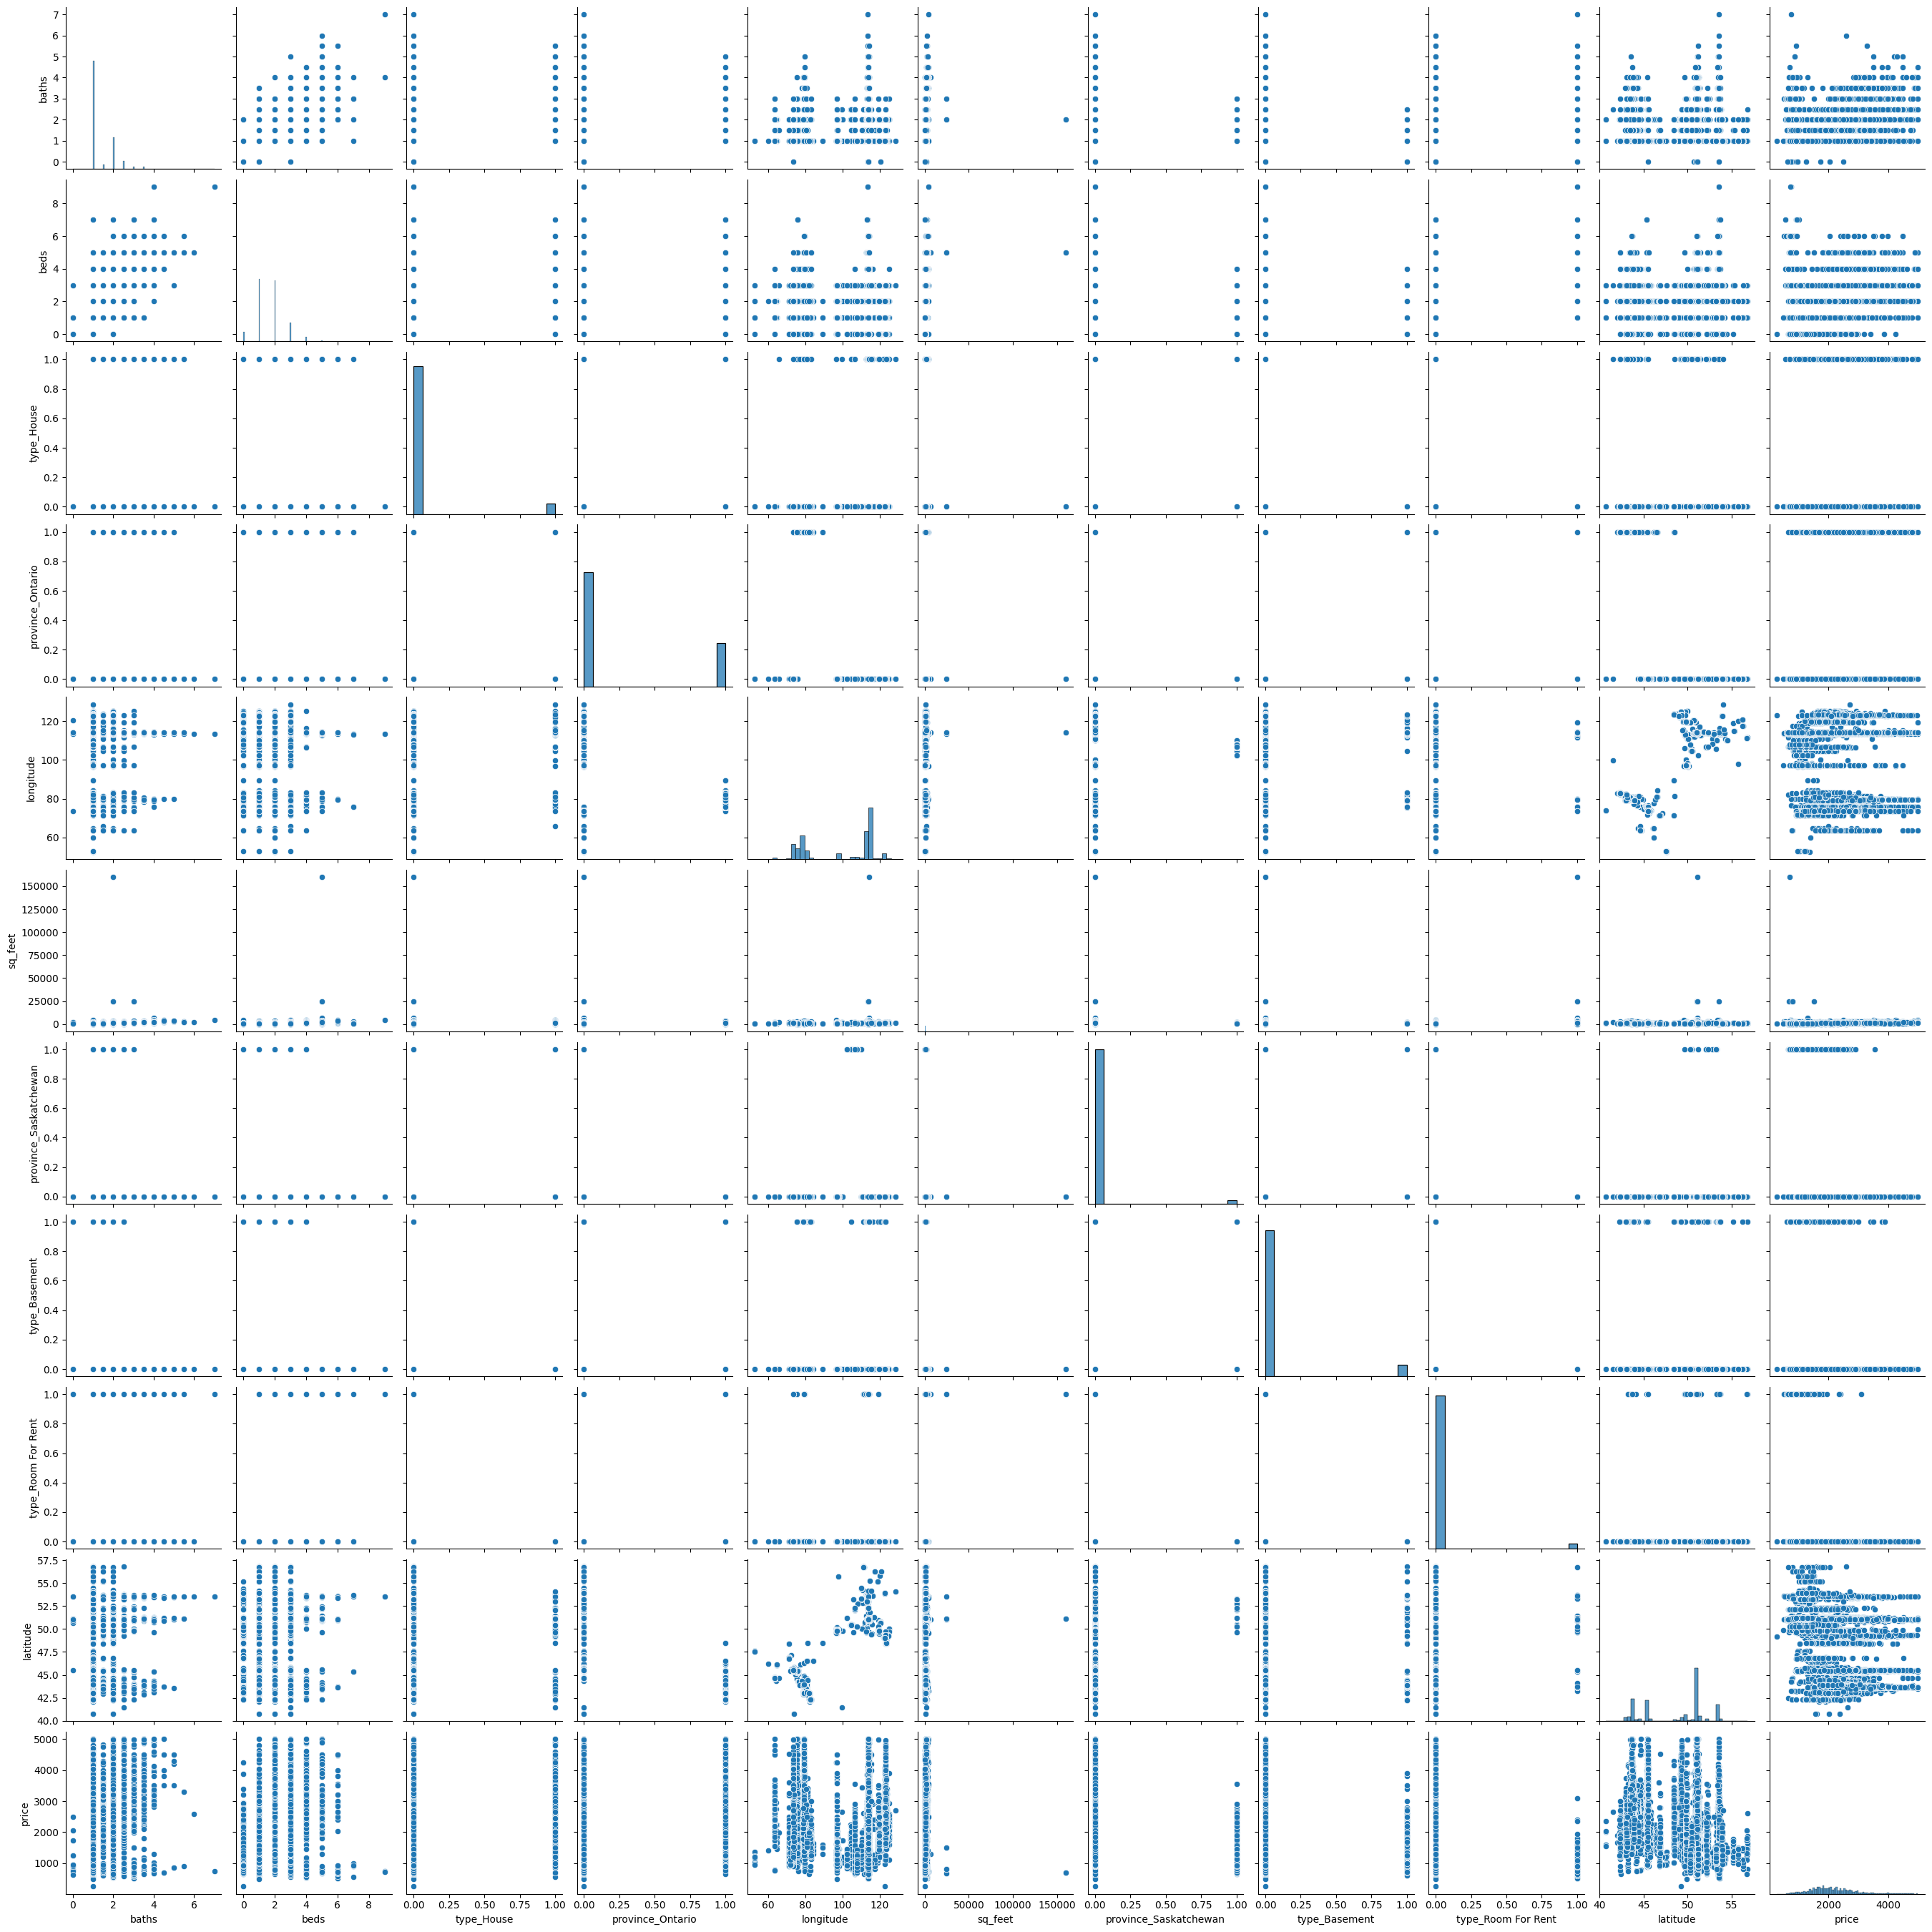

In [9]:
# Investigate the correlation to determine most valuable columns for prediction
# Create plot and adjust its size
plt.figure( figsize=(20, 20))

# Create paired plot
ax = sns.pairplot(X.join(y))

# Saving the plot t be able to zoom in
plt.savefig('../Graph/SLR_paiplot_train.png')

# Show plot
plt.show()

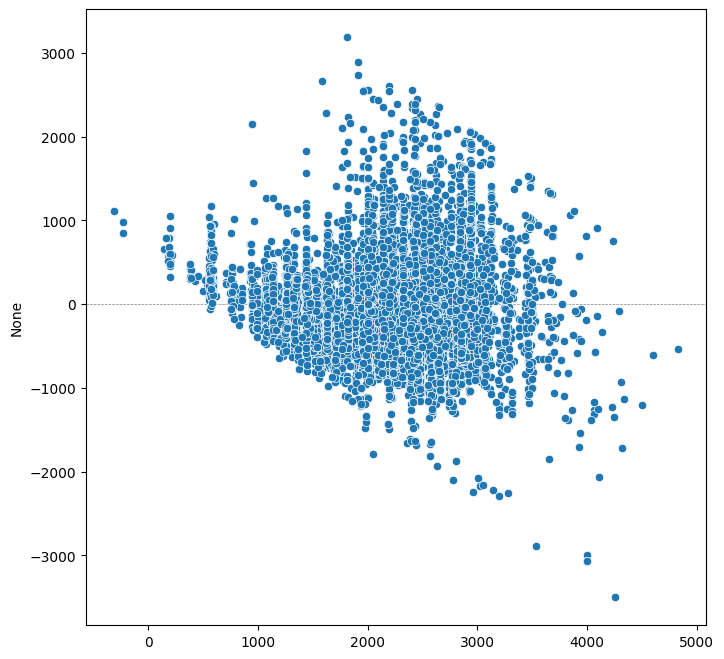

In [10]:
# Residual plot

# Create figure and adjust size
plt.figure(figsize = (8, 8))

# Add scatter plot
ax = sns.scatterplot(x=model.predict(), y=model.resid, zorder=3)

# Add grid y-axis line at 0
ax.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

In [11]:
# Summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2262.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:50:05   Log-Likelihood:            -1.3448e+05
No. Observations:               17682   AIC:                         2.690e+05
Df Residuals:                   17671   BIC:                         2.691e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2130.3161      3.657    582.518      0.000    2123.148    2137.484
baths                   259.1274      5.197     49.864      0.000     248.941     269.313
beds                    178.7208      5.152     34.688      0.000     168.622     188.820
type_House                9.3416      4.378      2.134      0.033       0.761      17.922
province_Ontario          0.8787      6.241      0.141      0.888     -11.355      13.112
longitude               303.4501      8.312     36.509      0.000     287.158     319.742
sq_feet                  -5.5309      3.792     -1.459      0.145     -12.963       1.901
province_Saskatchewan   -61.5544      3.746    -16.431      0.000     -68.897     -54.211
type_Basement           -95.8992      3.836    -24.999      0.000    -103.418     -88.380
type_Room For Rent     -220.4165      3.758    -58.649      0.000    -227.783    -213.050
latitude               -530.3128     10.108    -52.467      0.000    -550.125    -510.501
==============================================================================
Omnibus:                     3127.304   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12222.816
Skew:                           0.844   Prob(JB):                         0.00
Kurtosis:                       6.707   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sm.stats.stattools.durbin_watson(model.resid)

np.float64(1.9756360645123026)

Text(0.5, 1.0, 'QQ plot')

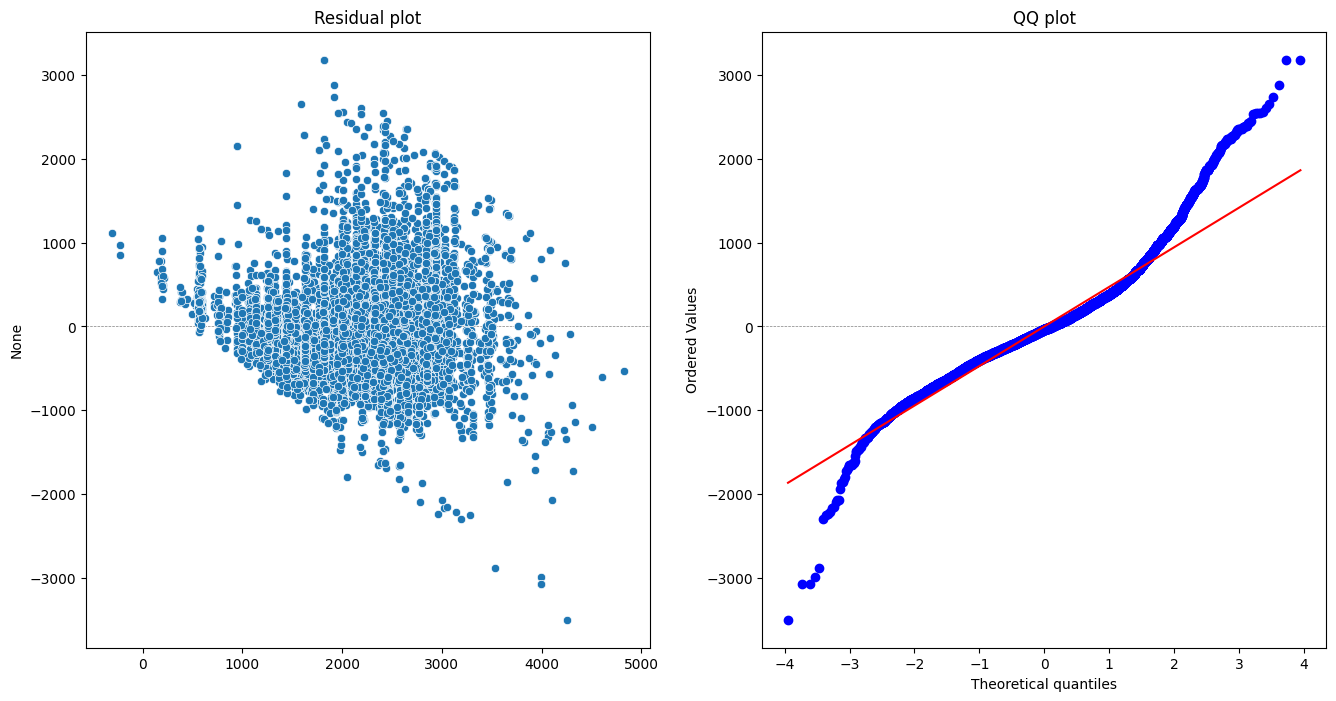

In [13]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=model.predict(), y=model.resid, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(model.resid, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

### Validation on testing dataset

In [14]:
# Define X and y
#X = X_test_scaled #pd.concat([X_train_scaled,X_test_scaled])

# Add a constant
X_test_scaled = sm.add_constant(X_test_scaled)
#X['const'] = 1.

y_pred = model.predict(X_test_scaled)
print(f"Predictions: {y_pred}")


Predictions: 0       2748.025565
1       1704.837553
2       1816.045933
3       2021.239073
4       2039.547427
           ...     
4416    2315.711069
4417    2328.749551
4418    2001.692825
4419    2438.338093
4420    2323.817857
Length: 4421, dtype: float64


<Axes: xlabel='price', ylabel='None'>

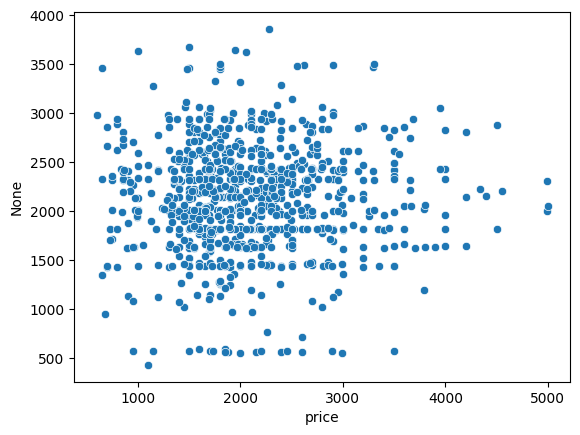

In [15]:
# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3)


In [16]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, pd.DataFrame(y_pred, columns=['price']))

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 341
The Mean Square Error = 226713
The Root Mean Square Error = 476
The R2 scores = 1


In [17]:
y_pred

0       2748.025565
1       1704.837553
2       1816.045933
3       2021.239073
4       2039.547427
           ...     
4416    2315.711069
4417    2328.749551
4418    2001.692825
4419    2438.338093
4420    2323.817857
Length: 4421, dtype: float64

In [18]:
# Compute RMSE using model.resid ## training set 


mae = np.mean(abs(model.resid))

mse = np.mean(model.resid ** 2)

rmse = np.sqrt(np.mean(model.resid ** 2))



print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n ')

The Mean Absolute Error = 348
The Mean Square Error = 236336
The Root Mean Square Error = 486
 


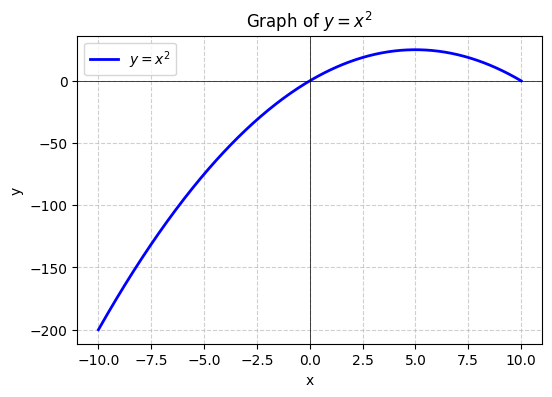

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
x = np.linspace(-10, 10, 400)  # Creates 400 points from -10 to 10
y = -x**2 + 10*x # Compute y = x^2

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$y = x^2$', color='b', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^2$')
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.legend()
plt.show()

/tmp/ipykernel_806736/2742636065.py:6: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x) # Compute y = x^2


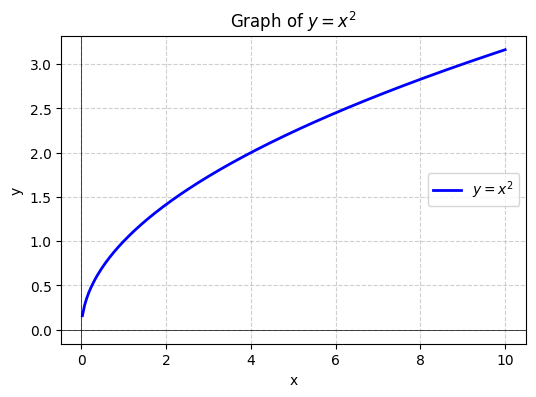

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
x = np.linspace(-10, 10, 400)  # Creates 400 points from -10 to 10
y = np.sqrt(x) # Compute y = x^2

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$y = x^2$', color='b', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^2$')
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.legend()
plt.show()

In [21]:
# Define independent (X) and dependent (Y) variables
X = X['beds'] ** 2
X = sm.add_constant(X)  # Add intercept term 

# Fit OLS Model
model = sm.OLS(y, X).fit()

# Extract coefficients
intercept, slope = model.params
equation = f"y = {intercept:.4f} + {slope:.4f}x"

print("Equation of best-fit line:", equation)

ValueError: endog and exog matrices are different sizes

In [ ]:
X_ = X['baths'] 
X_lin = sm.add_constant(X_)
model_lin = sm.OLS(y, X_lin).fit()
r2_lin = model_lin.rsquared
eq_lin = f"y = {model_lin.params[0]:.4f} + {model_lin.params[1]:.4f}x"
# Polynomial Fit (Quadratic)

X_poly = np.column_stack((X_**2, X_))  # X² and X
X_poly = sm.add_constant(X_poly)
model_poly = sm.OLS(y, X_poly).fit()
r2_poly = model_poly.rsquared
eq_poly = f"y = {model_poly.params[0]:.4f} + {model_poly.params[1]:.4f}x² + {model_poly.params[2]:.4f}x"

# Logarithmic Fit
#X_log = sm.add_constant(np.log(X))
#model_log = sm.OLS(y, X_log).fit()
#r2_log = model_log.rsquared
#eq_log = f"y = {model_log.params[0]:.4f} + {model_log.params[1]:.4f}ln(x)"

# sin Fit
X_sin = sm.add_constant(np.sin(X))
model_sin = sm.OLS(y, X_sin).fit()
r2_sin = model_sin.rsquared
eq_sin = f"y = {model_sin.params[0]:.4f} + {model_sin.params[1]:.4f}sin(x)"

# Compare R² values
print(f"Linear: R² = {r2_lin:.4f}, Equation: {eq_lin}")
print(f"Polynomial: R² = {r2_poly:.4f}, Equation: {eq_poly}")
#print(f"Logarithmic: R² = {r2_log:.4f}, Equation: {eq_log}")
print(f"Sin: R² = {r2_sin:.4f}, Equation: {eq_sin}")

# Best Fit Selection
best_fit = max((r2_lin, "Linear"), (r2_poly, "Polynomial"), (r2_sin, "sin")) #, (r2_log, "Logarithmic"))
print(f"\nBest fit: {best_fit[1]} with R² = {best_fit[0]:.4f}")